In [ ]:
!pip install opencv-python
# Instalando a lib opencv para ajudar no pre-processamento da imagem

In [ ]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os # manipular diretórios
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [ ]:
# função que infoema a classe da imagem
def me_ajuda(pred):
  dicionario = {
           0: "cat",
           1: "dog"}
  return dicionario[np.argmax(pred)]

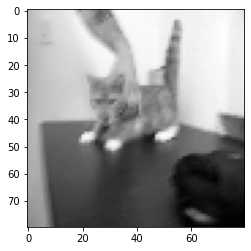

In [ ]:
# Selecionando a pasta e pre-processamento da imagem com o cv2 do opencv
# Padronizando o tamanho da imagem 80x80

main_dir = "Imagens/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [ ]:
# A função para solucionar o X e o y
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [ ]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [ ]:
#Normalize data
X = X/255.0

In [ ]:
# Criação do modelo
model = Sequential()

model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1002/1002 [==============================] - 902s 768ms/step - loss: 0.4476 - accuracy: 0.8068 - val_loss: 1.4134 - val_accuracy: 0.2790
Epoch 2/10
1002/1002 [==============================] - 707s 706ms/step - loss: 0.3536 - accuracy: 0.8496 - val_loss: 1.0939 - val_accuracy: 0.4831
Epoch 3/10
1002/1002 [==============================] - 405s 405ms/step - loss: 0.2772 - accuracy: 0.8848 - val_loss: 1.3172 - val_accuracy: 0.4872
Epoch 4/10
1002/1002 [==============================] - 449s 449ms/step - loss: 0.1986 - accuracy: 0.9223 - val_loss: 0.8750 - val_accuracy: 0.7126
Epoch 5/10
1002/1002 [==============================] - 453s 453ms/step - loss: 0.1223 - accuracy: 0.9559 - val_loss: 1.4394 - val_accuracy: 0.6305
Epoch 6/10
1002/1002 [==============================] - 476s 475ms/step - loss: 0.0673 - accuracy: 0.9785 - val_loss: 1.6952 - val_accuracy: 0.6498
Epoch 7/10
1002/1002 [==============================] - 416s 416ms/step - loss: 0.0372 - accuracy: 0.9883 - val_

In [ ]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [ ]:
predicted_val = [int(round(p[0])) for p in predictions]

In [ ]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [ ]:
lista = ['gato', 'cachorro']

In [ ]:
test = []
for x in submission_df.label:
    if x == 0:
        test.append(lista[0])
    else:
        test.append(lista[1])


submission_df['y_test'] =  test

In [ ]:
submission_df

,id,label,y_test
0,1,0,gato
1,10,0,gato
2,100,0,gato
3,1000,1,cachorro
4,10000,1,cachorro
...,...,...,...
12495,9995,0,gato
12496,9996,1,cachorro
12497,9997,1,cachorro
12498,9998,0,gato


gato
cat
gato


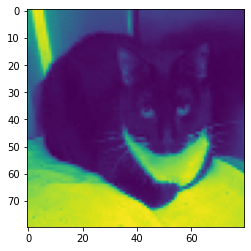

In [ ]:
# Conferindo se está de acordo
i = np.random.randint(low=0, high=3000)
test[i]
plt.imshow(X_test[i])
print(test[i])
print(me_ajuda(test[i]))
print(submission_df.y_test[i])